In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

Mounted at /content/drive


# Reading the images

In [2]:
ds_path = "/content/drive/MyDrive/computer_vision_exam/annotated/cropped_images/Bananas"
ds_path2 = "/content/drive/MyDrive/computer_vision_exam/annotated/cropped_images/Cassava"

In [3]:
banana_test_img_path = ds_path + "/0_frame400.jpg"
banana_test_img_path_2 = ds_path + "/1000_frame590.jpg"

In [4]:
cassava_test_img_path = ds_path2 + "/111_frame422.jpg"
cassava_test_img_path_2 = ds_path2 + "/1001_frame590.jpg"

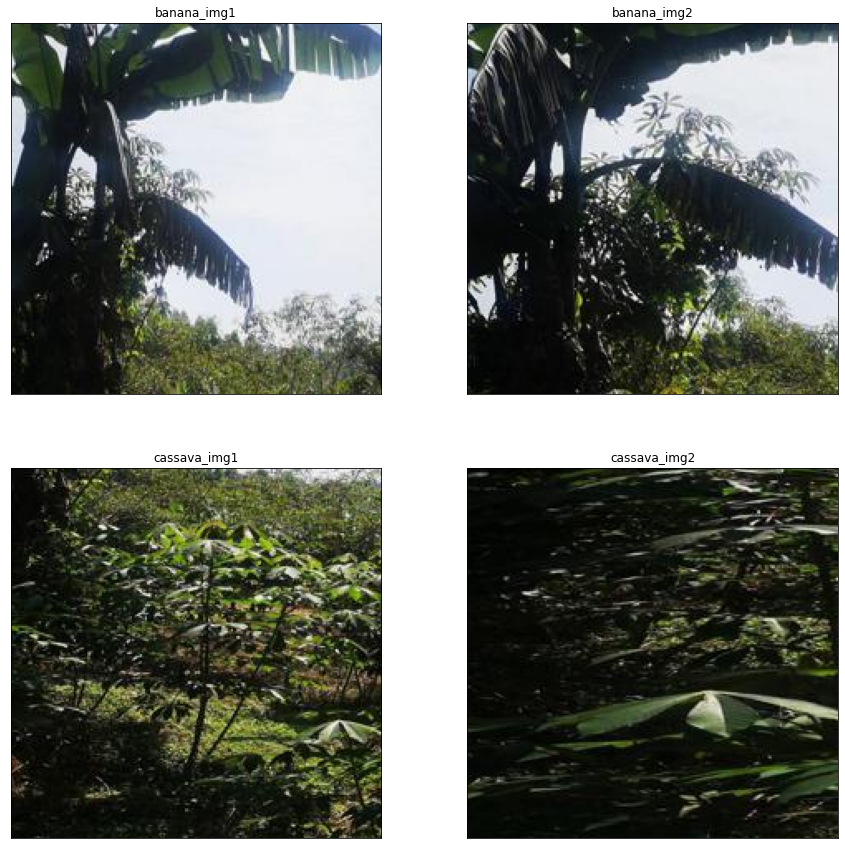

In [5]:
fig = plt.figure(figsize=(15, 15));
fig.subplots_adjust(hspace=0.2, wspace=0.2);


banana_img1 = cv2.imread(banana_test_img_path)
banana_img1 = cv2.cvtColor(banana_img1, cv2.COLOR_BGR2RGB)

banana_img2 = cv2.imread(banana_test_img_path_2)
banana_img2 = cv2.cvtColor(banana_img2, cv2.COLOR_BGR2RGB)

cassava_img1 = cv2.imread(cassava_test_img_path)
cassava_img1 = cv2.cvtColor(cassava_img1, cv2.COLOR_BGR2RGB)

cassava_img2 = cv2.imread(cassava_test_img_path_2)
cassava_img2 = cv2.cvtColor(cassava_img2, cv2.COLOR_BGR2RGB)

ax = fig.add_subplot(2, 2, 1);
ax.set_title('banana_img1');
ax.imshow((banana_img1));
ax.set_xticks([]); ax.set_yticks([]);


ax = fig.add_subplot(2, 2, 2);
ax.set_title('banana_img2');
ax.imshow((banana_img2));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('cassava_img1');
ax.imshow((cassava_img1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('cassava_img2');
ax.imshow((cassava_img2));
ax.set_xticks([]); ax.set_yticks([]);

## turn to gray scale

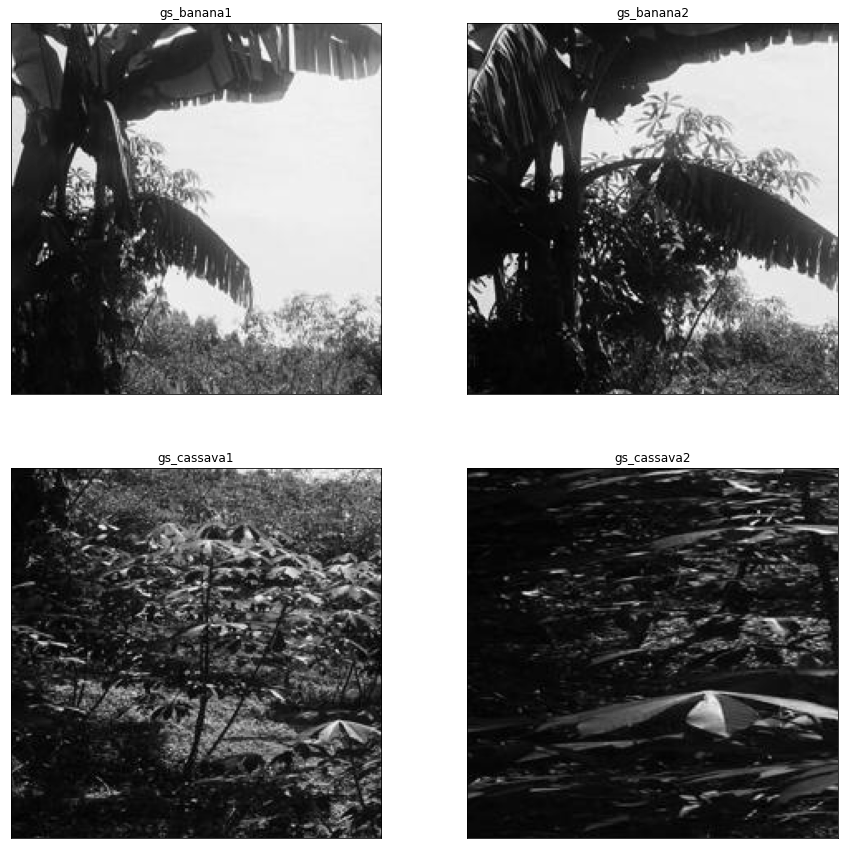

In [6]:
fig = plt.figure(figsize=(15, 15));
fig.subplots_adjust(hspace=0.2, wspace=0.2);


gs_banana1 = cv2.cvtColor(banana_img1,cv2.COLOR_RGB2GRAY)
gs_banana2 = cv2.cvtColor(banana_img2,cv2.COLOR_RGB2GRAY)

gs_cassava1 = cv2.cvtColor(cassava_img1,cv2.COLOR_RGB2GRAY)
gs_cassava2 = cv2.cvtColor(cassava_img2,cv2.COLOR_RGB2GRAY)


ax = fig.add_subplot(2, 2, 1);
ax.set_title('gs_banana1');
ax.imshow((gs_banana1), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);


ax = fig.add_subplot(2, 2, 2);
ax.set_title('gs_banana2');
ax.imshow((gs_banana2), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('gs_cassava1');
ax.imshow((gs_cassava1), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('gs_cassava2');
ax.imshow((gs_cassava2), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

# Feature Extraction

check image details

In [7]:
print(gs_banana1.shape)
print(gs_banana2.shape)
print(gs_cassava1.shape)
print(gs_cassava2.shape)


print(gs_banana1.size)
print(gs_banana2.size)
print(gs_cassava1.size)
print(gs_cassava2.size)

(224, 224)
(224, 224)
(224, 224)
(224, 224)
50176
50176
50176
50176


## Pixel Features

In [9]:
banana_img1_pixel = cv2.resize(banana_img1, (224, 224))
banana_img1_pixel = cv2.cvtColor(banana_img1_pixel, cv2.COLOR_RGB2BGR)

banana_img2_pixel = cv2.resize(banana_img2, (224, 224))
banana_img2_pixel = cv2.cvtColor(banana_img2_pixel, cv2.COLOR_RGB2BGR)

In [10]:
cassava_img1_pixel = cv2.resize(cassava_img1, (224, 224))
cassava_img1_pixel = cv2.cvtColor(cassava_img1_pixel, cv2.COLOR_RGB2BGR)

cassava_img2_pixel = cv2.resize(cassava_img2, (224, 224))
cassava_img2_pixel = cv2.cvtColor(cassava_img2_pixel, cv2.COLOR_RGB2BGR)

In [12]:
print(banana_img1_pixel,'\n',banana_img2_pixel,'\n',cassava_img1_pixel,'\n',cassava_img2_pixel)

[[[ 58  83  63]
  [ 56  83  63]
  [ 55  82  62]
  ...
  [231 227 216]
  [230 225 216]
  [223 221 211]]

 [[ 54  79  59]
  [ 52  79  59]
  [ 51  79  59]
  ...
  [234 225 215]
  [233 227 216]
  [232 228 217]]

 [[ 47  74  54]
  [ 48  75  55]
  [ 48  76  56]
  ...
  [234 222 210]
  [239 227 215]
  [233 224 211]]

 ...

 [[  4   7   5]
  [  7  10   8]
  [  9  12  10]
  ...
  [ 75  96  93]
  [ 55  76  73]
  [ 84 105 102]]

 [[  4   7   5]
  [  6   9   7]
  [  7  10   8]
  ...
  [ 62  83  80]
  [ 64  85  82]
  [106 127 124]]

 [[  4   7   5]
  [  4   7   5]
  [  5   8   6]
  ...
  [ 31  52  49]
  [ 66  87  84]
  [ 84 105 102]]] 
 [[[185 189 178]
  [208 212 201]
  [141 145 133]
  ...
  [ 73  54  39]
  [ 72  51  36]
  [ 73  52  37]]

 [[197 198 188]
  [201 202 192]
  [196 198 186]
  ...
  [ 70  51  36]
  [ 72  51  36]
  [ 74  53  38]]

 [[207 202 193]
  [171 169 159]
  [218 216 205]
  ...
  [ 78  60  43]
  [ 83  63  46]
  [ 83  63  46]]

 ...

 [[ 11  16  14]
  [ 19  24  22]
  [ 16  21  19]
  

In [13]:
pixel_gs_banana1 = np.reshape(gs_banana1, (224 * 224))
pixel_gs_banana2 = np.reshape(gs_banana2, (224 * 224))

pixel_gs_cassava1 = np.reshape(gs_cassava1, (224 * 224))
pixel_gs_cassava2 = np.reshape(gs_cassava2, (224 * 224))

print(pixel_gs_banana1,'\n',pixel_gs_banana2,'\n',pixel_gs_cassava1,'\n',pixel_gs_cassava2)

[ 74  74  73 ...  49  84 102] 
 [185 208 141 ...  70  89  61] 
 [ 6  7  7 ... 34 43 24] 
 [ 3  5  6 ... 48 35 35]


In [14]:
pixel_gs_banana1.shape,pixel_gs_banana1

((50176,), array([ 74,  74,  73, ...,  49,  84, 102], dtype=uint8))

In [15]:
pixel_gs_cassava1.shape,pixel_gs_cassava1

((50176,), array([ 6,  7,  7, ..., 34, 43, 24], dtype=uint8))

## SIFT

In [16]:
sift = cv2.xfeatures2d.SIFT_create()


banana_img1
banana_img2

cassava_img1

cassava_img2

array([[[ 2,  4,  1],
        [ 4,  6,  3],
        [ 5,  7,  4],
        ...,
        [24, 20,  9],
        [40, 33, 23],
        [67, 60, 50]],

       [[ 0,  1,  0],
        [ 0,  2,  0],
        [ 1,  3,  0],
        ...,
        [75, 71, 60],
        [56, 52, 41],
        [35, 31, 20]],

       [[ 8, 10,  7],
        [ 7,  9,  6],
        [ 5,  7,  4],
        ...,
        [69, 66, 57],
        [82, 80, 68],
        [79, 77, 65]],

       ...,

       [[ 4,  9,  3],
        [ 4,  9,  3],
        [ 4,  9,  3],
        ...,
        [38, 40, 26],
        [34, 36, 23],
        [31, 33, 19]],

       [[ 4,  9,  3],
        [ 4,  9,  3],
        [ 4,  9,  3],
        ...,
        [33, 36, 19],
        [52, 54, 40],
        [75, 78, 61]],

       [[ 4,  9,  3],
        [ 4,  9,  3],
        [ 4,  9,  3],
        ...,
        [48, 51, 34],
        [35, 38, 21],
        [35, 38, 21]]], dtype=uint8)

In [17]:
keypoints_banana1, descriptors_banana1 = sift.detectAndCompute(banana_img1, None)

keypoints_banana2, descriptors_banana2 = sift.detectAndCompute(banana_img2, None)

keypoints_cassava1, descriptors_cassava = sift.detectAndCompute(cassava_img1, None)

keypoints_cassava2, descriptors_cassava2 = sift.detectAndCompute(cassava_img2, None)

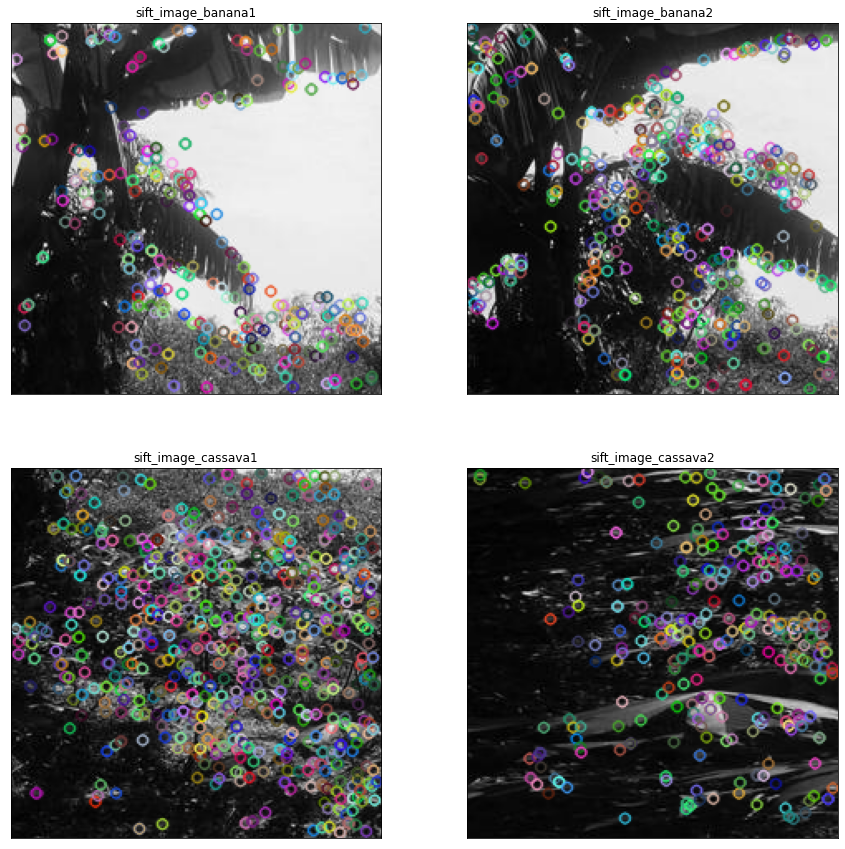

In [18]:
fig = plt.figure(figsize=(15, 15));
fig.subplots_adjust(hspace=0.2, wspace=0.2);

# draw the detected key points
sift_image_banana1 = cv2.drawKeypoints(gs_banana1, keypoints_banana1, banana_img1)
sift_image_banana2 = cv2.drawKeypoints(gs_banana2, keypoints_banana2, banana_img2)
sift_image_cassava1 = cv2.drawKeypoints(gs_cassava1, keypoints_cassava1, cassava_img1)
sift_image_cassava2 = cv2.drawKeypoints(gs_cassava2, keypoints_cassava2, cassava_img2)
# show the image


ax = fig.add_subplot(2, 2, 1);
ax.set_title('sift_image_banana1');
ax.imshow((sift_image_banana1));
ax.set_xticks([]); ax.set_yticks([]);


ax = fig.add_subplot(2, 2, 2);
ax.set_title('sift_image_banana2');
ax.imshow((sift_image_banana2));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('sift_image_cassava1');
ax.imshow((sift_image_cassava1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('sift_image_cassava2');
ax.imshow((sift_image_cassava2));
ax.set_xticks([]); ax.set_yticks([]);

## Edges

In [19]:
# from skimage.io import imread, imshow
# from skimage.filters import prewitt_h,prewitt_v
# import matplotlib.pyplot as plt
# %matplotlib inline

# #reading the image 
# image = imread('puppy.jpeg',as_gray=True)

# #calculating horizontal edges using prewitt kernel
# edges_prewitt_horizontal = prewitt_h(image)
# #calculating vertical edges using prewitt kernel
# edges_prewitt_vertical = prewitt_v(image)

# imshow(edges_prewitt_vertical, cmap='gray')

## Local Binary Pattern Extraction

In [20]:
# # import the necessary packages
# from skimage import feature
# class LocalBinaryPatterns:
# 	def __init__(self, numPoints, radius):
# 		# store the number of points and radius
# 		self.numPoints = numPoints
# 		self.radius = radius
# 	def describe(self, image, eps=1e-7):
# 		# compute the Local Binary Pattern representation
# 		# of the image, and then use the LBP representation
# 		# to build the histogram of patterns
# 		lbp = feature.local_binary_pattern(image, self.numPoints,
# 			self.radius, method="uniform")
# 		(hist, _) = np.histogram(lbp.ravel(),
# 			bins=np.arange(0, self.numPoints + 3),
# 			range=(0, self.numPoints + 2))
# 		# normalize the histogram
# 		hist = hist.astype("float")
# 		hist /= (hist.sum() + eps)
# 		# return the histogram of Local Binary Patterns
# 		return hist

In [21]:
from skimage.feature import local_binary_pattern

# # type of LBP
# METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
# radius = 1  # distance between central pixels and comparison pixels
# n_points = 8 * radius  # define number of comparison pixels

# # create list for LBP representations
# lbp_imgs = []

# # create LBP for each image and add to list
# for img in imgs:
#   lbp_imgs.append(local_binary_pattern(img, n_points, radius, METHOD))


# type of LBP
METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
radius = 1  # distance between central pixels and comparison pixels
n_points = 8 * radius  # define number of comparison pixels

# create list for LBP representations
lbp_imgs = []

# create LBP for each image and add to list
lbp_imgs.append(local_binary_pattern(gs_banana1, n_points, radius, METHOD))

In [22]:
lbp_imgs

[array([[1., 1., 1., ..., 0., 4., 3.],
        [3., 5., 4., ..., 4., 9., 0.],
        [3., 4., 4., ..., 7., 0., 3.],
        ...,
        [5., 4., 0., ..., 0., 7., 1.],
        [5., 3., 2., ..., 9., 9., 0.],
        [3., 5., 4., ..., 5., 2., 1.]])]

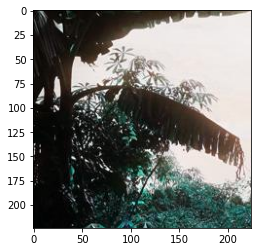

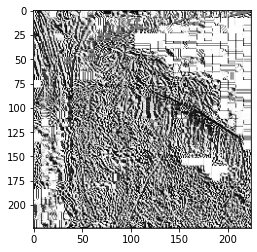

LBP Program is finished


In [23]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = '/content/drive/MyDrive/computer_vision_exam/annotated/cropped_images/Bananas/1035_frame597.jpg'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()
   
print("LBP Program is finished")

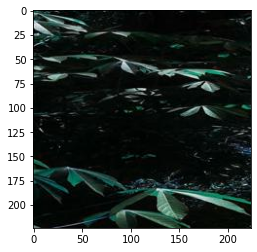

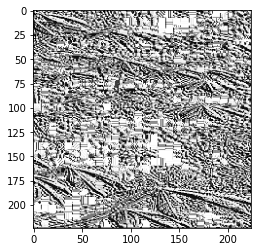

LBP Program is finished
[[  6 135 223 ... 255   9   0]
 [ 62 119 255 ... 252 230 195]
 [ 56 112 244 ... 112 240 227]
 ...
 [ 48 240 240 ...  27  56  32]
 [ 32 192 224 ... 127  12   0]
 [  2 131 129 ... 132 134 131]]


In [24]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = '/content/drive/MyDrive/computer_vision_exam/annotated/cropped_images/Cassava/112_frame422.jpg'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()
   
print("LBP Program is finished")
print(img_lbp)

In [25]:
import pandas as pd
ds_path = "/content/drive/MyDrive/computer_vision_exam/annotated/cropped_images/Bananas"

img_files = os.listdir(ds_path)
def create_dataset():
    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    for file in img_files:
        imgpath = ds_path + "/" + file
        main_img = cv2.imread(imgpath)


        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
        gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        
        def get_pixel(img, center, x, y):
          new_value = 0
      
          try:
              # If local neighbourhood pixel 
              # value is greater than or equal
              # to center pixel values then 
              # set it to 1
              if img[x][y] >= center:
                  new_value = 1
                    
          except:
              # Exception is required when 
              # neighbourhood value of a center
              # pixel value is null i.e. values
              # present at boundaries.
              pass
            
          return new_value
   
# Function for calculating LBP
        def lbp_calculated_pixel(img, x, y):
          
            center = img[x][y]
          
            val_ar = []
              
            # top_left
            val_ar.append(get_pixel(img, center, x-1, y-1))
              
            # top
            val_ar.append(get_pixel(img, center, x-1, y))
              
            # top_right
            val_ar.append(get_pixel(img, center, x-1, y + 1))
              
            # right
            val_ar.append(get_pixel(img, center, x, y + 1))
              
            # bottom_right
            val_ar.append(get_pixel(img, center, x + 1, y + 1))
              
            # bottom
            val_ar.append(get_pixel(img, center, x + 1, y))
              
            # bottom_left
            val_ar.append(get_pixel(img, center, x + 1, y-1))
              
            # left
            val_ar.append(get_pixel(img, center, x, y-1))
              
            # Now, we need to convert binary
            # values to decimal
            power_val = [1, 2, 4, 8, 16, 32, 64, 128]
          
            val = 0
              
            for i in range(len(val_ar)):
                val += val_ar[i] * power_val[i]
                  
            return val

        height, width, _ = img.shape
          
        # We need to convert RGB image 
        # into gray one because gray 
        # image has one channel only.
        img_gray = cv2.cvtColor(img,
                                cv2.COLOR_BGR2GRAY)
          
        # Create a numpy array as 
        # the same height and width 
        # of RGB image
        img_lbp = np.zeros((height, width),
                          np.uint8)
          

        
        
        df_temp = pd.DataFrame([img_lbp],columns=names)
        df = df.append(df_temp)
        print(file)
    return df

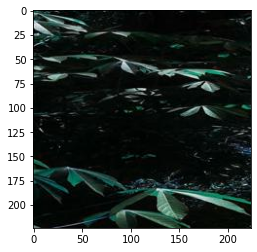

In [26]:
import PIL
import tqdm
import pickle
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops



img_bgr = cv2.imread(path, 1)

img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
   


#img_gray = img_bgr.convert('L') #Converting to grayscale
img_arr = np.array(img_gray) #Converting to array
plt.imshow(img_bgr)

## LBP

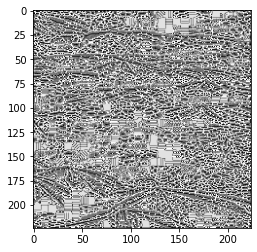

In [27]:
# Finding LBP
feat_lbp = local_binary_pattern(img_arr,8,1,'uniform') #Radius = 1, No. of neighbours = 8
feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255) #Converting to unit8
lbp_img = PIL.Image.fromarray(feat_lbp) #Conversion from array to PIL image
plt.imshow(lbp_img,cmap='gray') #Displaying LBP

In [28]:
# Energy and Entropy of LBP feature
lbp_hist,_ = np.histogram(feat_lbp,8)
lbp_hist = np.array(lbp_hist,dtype=float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy = '+str(lbp_energy))
print('LBP entropy = '+str(lbp_entropy))

LBP energy = 0.1615192535667308
LBP entropy = 2.8022953383628413


## Co-occurance matrix

In [29]:
# Finding GLCM features from co-occurance matrix
gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True) # Co-occurance matrix
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')
print('Contrast = '+str(contrast[0][0]))
print('Dissimilarity = '+str(dissimilarity[0][0]))
print('Homogeneity = '+str(homogeneity[0][0]))
print('Energy = '+str(energy[0][0]))
print('Correlation = '+str(correlation[0][0]))

Contrast = 378.51365427927897
Dissimilarity = 9.403816763191756
Homogeneity = 0.2815802468796536
Energy = 0.06969232847253096
Correlation = 0.8577053443382598


## Gabor filter

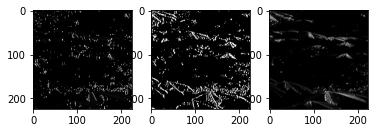

In [30]:
# Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
# Displaying the filter response
fig, ax = plt.subplots(1,3)    
ax[0].imshow(gaborFilt_real,cmap='gray')
ax[1].imshow(gaborFilt_imag,cmap='gray')
ax[2].imshow(gaborFilt,cmap='gray')

In [31]:
# Energy and Entropy of Gabor filter response
gabor_hist,_ = np.histogram(gaborFilt,8)
gabor_hist = np.array(gabor_hist,dtype=float)
gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
gabor_energy = np.sum(gabor_prob**2)
gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
print('Gabor energy = '+str(gabor_energy))
print('Gabor entropy = '+str(gabor_entropy))

Gabor energy = 0.8463023009770912
Gabor entropy = 0.5736831121535678
